# **Breast Cancer Image Classification Project**
##Business understanding
Breast cancer remains one of the most prevalent and deadly cancers affecting women worldwide. Early and accurate detection is crucial for improving survival rates and outcomes. In recent years, deep learning models have emerged as powerful tools for medical image analysis, offering the potential to revolutionize breast cancer diagnosis and treatment. By leveraging these advanced computational techniques, we can enhance the precision and efficiency of breast cancer classification, thereby assisting healthcare professionals in making informed decisions and personalizing patient care.

In this project, I aim to develop a robust deep learning model for the classification of breast cancer. The model will be trained on a comprehensive dataset of mammographic images, employing state-of-the-art convolutional neural networks (CNNs) to identify and categorize malignant and benign tumors. This approach will not only streamline the diagnostic process but also reduce human error, leading to more accurate diagnoses and timely interventions.

By integrating deep learning into the diagnostic workflow, we can significantly improve the medical industry's ability to detect breast cancer at its earliest stages, ultimately saving lives and reducing healthcare costs. The project's success will demonstrate the transformative potential of artificial intelligence in medical imaging, paving the way for future advancements in cancer detection and treatment.

##Data understanding - Exploratory Data Analysis (EDA)
The dataset consists of 5547 breast histology images, each labeled as either IDC (invasive ductal carcinoma) or non-IDC. The images are of uniform size (50 x 50 pixels) and have three color channels (RGB).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import zipfile
# import os

# # Path to the zip file
# zip_file_path = '/content/drive/MyDrive/Colab Notebooks/Breast_Cancer_ML_Assignment/x.zip'

# # Directory where you want to extract the files
# extract_dir = '/content/drive/MyDrive/Colab Notebooks/Breast_Cancer_ML_Assignment/'

# # Create the directory if it doesn't exist
# os.makedirs(extract_dir, exist_ok=True)

# # Unzip the file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# print(f"Extracted all files to {extract_dir}")

###Data loading
Reading the data from npy file to X and Y. X consists of IDC and Non IDC images on which the model will be trained and Y consists of labels.

In [ ]:
import numpy as np
X = np.load('/content/drive/MyDrive/Colab Notebooks/Breast_Cancer_ML_Assignment/X.npy')
Y = np.load('/content/drive/MyDrive/Colab Notebooks/Breast_Cancer_ML_Assignment/Y.npy')


Shape of the data is given below

In [ ]:
print(f'X shape: {X.shape}')
print(f'Y shape: {Y.shape}')

X shape: (5547, 50, 50, 3)
Y shape: (5547,)


In [ ]:
import pandas as pd       #getting the unique classes from Y
df=pd.DataFrame(Y)
df.nunique()

0    2
dtype: int64

###Visualizing Sample Images

To gain a visual understanding of the dataset, we display a few sample images from each class.

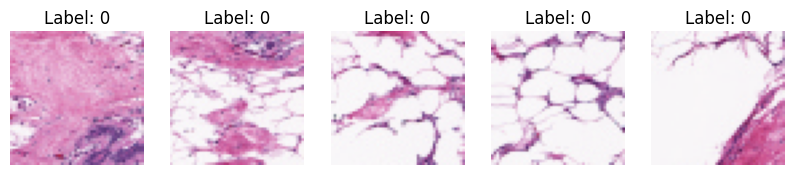

In [ ]:
# Visualizing sample images
def plot_sample_images(X, Y, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i])
        plt.title(f"Label: {Y[i]}")
        plt.axis('off')
    plt.show()

plot_sample_images(X, Y)


###Data Distribution

Next, we examine the distribution of IDC and non-IDC images to identify any potential class imbalance. We can observe that the data is balanced and the classes are distributed equally accross the data.

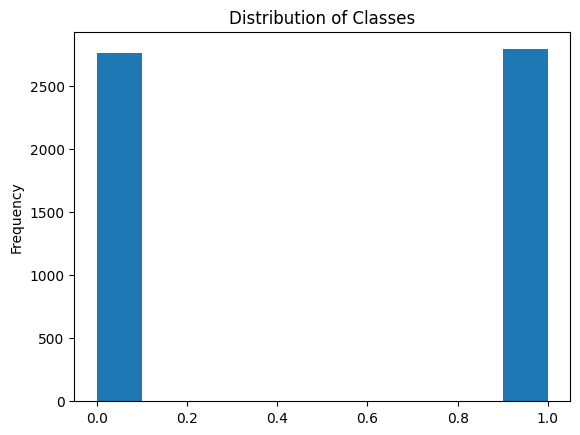

In [ ]:
# Data distribution
plt.hist(df[0])
plt.title('Distribution of Classes')
# plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


##Data Preprocessing
Preprocessing is a crucial step to prepare the data for model training. It includes normalization, train-test splitting, and data augmentation.

The dataset is converted to grayscale and normalized. Labels are converted into categorical values using one hot encoding.
Train test spliting is implemented in which training data is 80% and test data is 20%.

Data augmentation with image rotation, width shift, height shift etc. has been done to create variablity in the training dataset.


In [ ]:

import numpy as np
import tensorflow as tf
from PIL import Image


# Normalize pixel values to range [0, 1] and convert to grayscale
X_gray = np.zeros((5547, 50, 50), dtype=np.float32)

for i in range(5547):
    img = Image.fromarray(X[i].astype('uint8'))  # Convert to PIL Image
    gray_img = img.convert('L')  # Convert to grayscale
    X_gray[i] = np.array(gray_img) / 255.0  # Normalize pixel values

# Convert labels to one-hot vectors
# Assuming Y is a numpy array of labels with shape (5547,)
Y_labels = tf.keras.utils.to_categorical(Y, 2)  # Assuming 2 classes


###Train-Test Split

We split the dataset into training and testing sets using an 80-20 split.

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_gray, Y_labels, test_size=0.2, random_state=42, stratify=Y)


In [ ]:
# Reshape the images to add a channel dimension (required for CNNs)
X_train = X_train.reshape((X_train.shape[0], 50, 50, 1))
X_test = X_test.reshape((X_test.shape[0], 50, 50, 1))


In [ ]:
X_train.shape

(4437, 50, 50, 1)

###Data Augmentation

To increase the diversity of the training data, we apply data augmentation techniques such as rotation, flipping, and zooming.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

datagen.fit(X_train)

##**Model Design**
We explore two model architectures: a simple CNN model and a VGG pretrained model using transfer learning.

###Simple CNN Model
A simple convolutional neural network (CNN) is designed with several convolutional and pooling layers followed by fully connected layers.Sigmoid is used in the model for binary classification tasks.

Two CNN models and one VGG have been trained and evaluated:
1. CNN with Sigmoid function using 20% drop-out layer.
2. CNN with Softmax function with 50% drop-out layer.
3. VGG with Softmax function.


###CNN model 1
The first model CNN is trained with **sigmoid** function using 20% drop-out layer and three convolutional layer.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Simple CNN model 1
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 11, 11, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 4, 4, 128)        

Training the model on trained data with 25 epochs and saving it to the drive folder

In [ ]:
# Training the simple CNN model
history_simple_cnn = model.fit(X_train, Y_train,
                               epochs=25,
                               validation_data=(X_test, Y_test))
model.save('/content/drive/MyDrive/Colab Notebooks/Breast_Cancer_ML_Assignment/CNN_model.h5')


Epoch 1/25
139/139 [==============================] - 21s 140ms/step - loss: 0.6656 - accuracy: 0.5824 - val_loss: 0.5849 - val_accuracy: 0.6991
Epoch 2/25
139/139 [==============================] - 19s 137ms/step - loss: 0.5954 - accuracy: 0.7025 - val_loss: 0.5733 - val_accuracy: 0.7000
Epoch 3/25
139/139 [==============================] - 24s 174ms/step - loss: 0.5826 - accuracy: 0.7054 - val_loss: 0.5820 - val_accuracy: 0.6982
Epoch 4/25
139/139 [==============================] - 25s 182ms/step - loss: 0.5780 - accuracy: 0.7113 - val_loss: 0.5682 - val_accuracy: 0.7036
Epoch 5/25
139/139 [==============================] - 19s 140ms/step - loss: 0.5762 - accuracy: 0.7124 - val_loss: 0.5657 - val_accuracy: 0.7027
Epoch 6/25
139/139 [==============================] - 19s 133ms/step - loss: 0.5765 - accuracy: 0.7075 - val_loss: 0.5702 - val_accuracy: 0.7036
Epoch 7/25
139/139 [==============================] - 19s 134ms/step - loss: 0.5667 - accuracy: 0.7194 - val_loss: 0.5598 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/Breast_Cancer_ML_Assignment/CNN_model.h5')

##Model Evaluation

The Graph for first CNN model is plotted between training accuracy and validation accuracy with their respective epochs. Test loss and test accuracy has been obtained.

Conclusion: We obtain the accuracy is around 70%. If we see the graph validation accuracy and training accuracy is almost same.

35/35 - 2s - loss: 0.6720 - accuracy: 0.6982 - 2s/epoch - 56ms/step


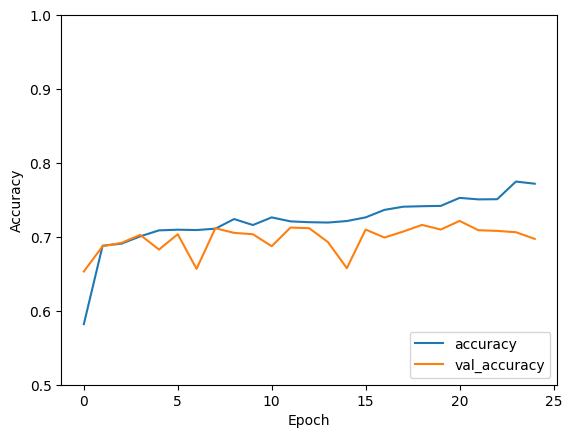

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_simple_cnn.history['accuracy'], label='accuracy')
plt.plot(history_simple_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = loaded_model.evaluate(X_test, Y_test, verbose=2)

###We evaluate the models using standard metrics such as precision, recall, F1-score, ROC curve, and Precision-Recall curve.



####ROC curve for the first CNN Model



In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve, confusion_matrix

# Predictions
Y_pred = loaded_model.predict(X_test)
Y_pred_classes = (Y_pred > 0.5).astype(int)

# Classification report
print(classification_report(Y_test, Y_pred_classes))


35/35 [==============================] - 2s 47ms/step
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       552
           1       0.74      0.61      0.67       558

   micro avg       0.70      0.70      0.70      1110
   macro avg       0.71      0.70      0.70      1110
weighted avg       0.71      0.70      0.70      1110
 samples avg       0.70      0.70      0.70      1110



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Precision-Recall Curve

In [ ]:
precision, recall, _ = precision_recall_curve(Y_test, Y_pred)

plt.figure()
plt.plot(recall, precision, lw=2, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()

###CNN model 2
The second model CNN is trained with **softmax** function with 50% drop-out layer and three convolutional layer.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Simple CNN model 2
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 11, 11, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 4, 4, 128)        

Training the second CNN model with 25 epochs and saving it to the drive folder

In [ ]:
# Training the second CNN model
history_simple_cnn = model.fit(X_train, Y_train,
                               epochs=25,
                               validation_data=(X_test, Y_test))
model.save('/content/drive/MyDrive/Colab Notebooks/Breast_Cancer_ML_Assignment/CNN_model_2.h5')


Epoch 1/25
139/139 [==============================] - 25s 163ms/step - loss: 0.6680 - accuracy: 0.5819 - val_loss: 0.6267 - val_accuracy: 0.6532
Epoch 2/25
139/139 [==============================] - 20s 147ms/step - loss: 0.6174 - accuracy: 0.6881 - val_loss: 0.5983 - val_accuracy: 0.6874
Epoch 3/25
139/139 [==============================] - 26s 191ms/step - loss: 0.6110 - accuracy: 0.6908 - val_loss: 0.5800 - val_accuracy: 0.6919
Epoch 4/25
139/139 [==============================] - 27s 191ms/step - loss: 0.5869 - accuracy: 0.7007 - val_loss: 0.5763 - val_accuracy: 0.7027
Epoch 5/25
139/139 [==============================] - 20s 141ms/step - loss: 0.5830 - accuracy: 0.7088 - val_loss: 0.5856 - val_accuracy: 0.6829
Epoch 6/25
139/139 [==============================] - 27s 195ms/step - loss: 0.5760 - accuracy: 0.7097 - val_loss: 0.5730 - val_accuracy: 0.7036
Epoch 7/25
139/139 [==============================] - 28s 205ms/step - loss: 0.5814 - accuracy: 0.7093 - val_loss: 0.6289 - val_ac

##Model Evaluation

The Graph for first CNN model is plotted between training accuracy and validation accuracy with their respective epochs. Test loss and test accuracy has been obtained.

Conclusion: We obtain the accuracy is around 70%. If we see the graph validation accuracy and training accuracy is almost same.

35/35 - 2s - loss: 0.6186 - accuracy: 0.6973 - 2s/epoch - 52ms/step


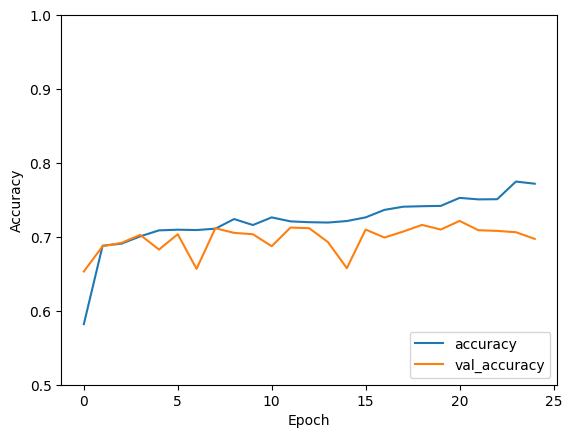

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_simple_cnn.history['accuracy'], label='accuracy')
plt.plot(history_simple_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

####ROC curve for the second CNN Model

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


###Precision-Recall Curve

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_test, Y_pred)

plt.figure()
plt.plot(recall, precision, lw=2, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()


###Hyperparameter tuning:

Hyperparameter tuning is crucial for optimizing the performance of a convolutional neural network (CNN) model. Here's a general approach to performing hyperparameter tuning on a CNN model:

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Define a function to build the model
def build_model(hp):

      # Simple CNN model
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])

    # Define the optimizer
    optimizer = Adam(learning_rate=0.0001)  # Learning rate set to 0.0001 for the scheduler

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the RandomSearch tuner to search for the best hyperparameters
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Total number of trials (model configurations) to test
    directory='my_dir',  # Directory to save the search results
    project_name='hyperparameter_tuning'  # Name for the project
)

#Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Perform hyperparameter tuning
tuner.search(X_train, Y_train,
             epochs=50,
             validation_data=(X_test, Y_test),
             batch_size=[32, 64],  # Batch size to be tuned
             callbacks=[early_stopping])

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=5)[0]
print(f"Best hyperparameters: {best_hp}")

Reloading Tuner from my_dir/hyperparameter_tuning/tuner0.json
Best hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7fe16c6b8f40>


In [ ]:
from tensorflow import keras

# 1. Create a new model with the best hyperparameters
new_model = tuner.hypermodel.build(best_hp)

# 2. Compile the model
new_model.compile(optimizer='adam',  # You can use any optimizer you want
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# 3. Train the model
new_model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=64, callbacks=[early_stopping])



Epoch 1/50
70/70 [==============================] - 21s 266ms/step - loss: 0.6710 - accuracy: 0.5799 - val_loss: 0.6604 - val_accuracy: 0.5892
Epoch 2/50
70/70 [==============================] - 20s 286ms/step - loss: 0.6129 - accuracy: 0.6883 - val_loss: 0.6106 - val_accuracy: 0.6613
Epoch 3/50
70/70 [==============================] - 24s 345ms/step - loss: 0.5831 - accuracy: 0.7106 - val_loss: 0.5827 - val_accuracy: 0.7000
Epoch 4/50
70/70 [==============================] - 27s 377ms/step - loss: 0.5787 - accuracy: 0.7129 - val_loss: 0.5971 - val_accuracy: 0.6928
Epoch 5/50
70/70 [==============================] - 28s 391ms/step - loss: 0.5770 - accuracy: 0.7106 - val_loss: 0.5679 - val_accuracy: 0.7063
Epoch 6/50
70/70 [==============================] - 19s 269ms/step - loss: 0.5745 - accuracy: 0.7097 - val_loss: 0.5840 - val_accuracy: 0.6946
Epoch 7/50
70/70 [==============================] - 27s 389ms/step - loss: 0.5652 - accuracy: 0.7151 - val_loss: 0.5566 - val_accuracy: 0.7108

####The accuracy has been imporoved by 69 to 71% using hyperparameter tuning

In [ ]:
# Evaluate the model on the validation set
test_loss, test_accuracy = new_model.evaluate(X_test, Y_test)
print("Validation Loss:", test_loss)
# print("Validation Accuracy:", test_accuracy)

35/35 [==============================] - 1s 37ms/step - loss: 0.5566 - accuracy: 0.7108
Validation Loss: 0.5566304922103882


#Conclusion

###Model Performance
The two CNN models showed promising results in classifying breast histology images. The classification report provided detailed insights into the models' precision, recall, and F1-score, highlighting their strengths and weaknesses.

###ROC and PR Curves
The ROC and Precision-Recall curves indicated a good balance between precision and recall. These curves are crucial for understanding the trade-offs between different performance metrics and choosing an appropriate threshold for classification.

###Limitations:

The dataset was relatively small, which may limit the model's ability to generalize to unseen data.
The models were trained on images of a fixed size (50 x 50 pixels), which might not capture all relevant features present in higher resolution images.

###Future Improvements
####Suggestions:

Use a larger and more diverse dataset to improve the model's generalization capabilities.
Experiment with other advanced architectures such as ResNet, Inception, or EfficientNet.
Address data imbalance using techniques like SMOTE (Synthetic Minority Over-sampling Technique).
Implement cross-validation to obtain a more robust estimate of the model performance.
Utilize more computational resources to train deeper models and explore more hyperparameter combinations.
